# common templates

## Jupyter

In [ ]:
# %matplotlib inline

In [1]:
%conda info


     active environment : sandbox39
    active env location : C:\Users\chlje\anaconda3\envs\sandbox39
            shell level : 1
       user config file : C:\Users\chlje\.condarc
 populated config files : C:\Users\chlje\.condarc
          conda version : 23.7.2
    conda-build version : 3.26.0
         python version : 3.8.17.final.0
       virtual packages : __archspec=1=x86_64
                          __cuda=12.2=0
                          __win=0=0
       base environment : C:\Users\chlje\anaconda3  (writable)
      conda av data dir : C:\Users\chlje\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anacon

In [ ]:
# Legacy Jupyter Notebook width control

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
# Import custom libraries 

# Auto reload libraries
%load_ext autoreload
%autoreload 2

import mylib

## Basic Import & Settings

mostly included in base anaconda

### routine libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Speed up numpy & pandas

import numba
import dask.dataframe as dd

In [ ]:
from tqdm import tqdm, trange
# from tqdm.notebook import tqdm

from time import time
from datetime import datetime

In [ ]:
import re


In [ ]:
import scipy

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler


In [ ]:
import sys, os
import json, pickle
from pathlib import Path

### pandas

In [ ]:
# pandas number value format

# pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.float_format', lambda x: f'{x:,g}')

In [ ]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300
 
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

### path

In [ ]:
MY_PATH = Path('/home/jaepil').resolve() # absolute path
CWD_PATH = Path('.').resolve() # relative path

# Add path to sys.path
sys.path.append(MY_PATH.as_posix())
sys.path.append(CWD_PATH.as_posix())

DATA_PATH = CWD_PATH / 'data'
DUMP_PATH = CWD_PATH / 'dump_data'
SQL_PATH = CWD_PATH / 'query'

### Custom Libraries

In [ ]:
# custom libs

import eda_utils as eutils

## Special Imports 

Special environment or installation required

In [ ]:
# Auto EDA library

import pandas_profiling
from pandas_profiling import ProfileReport

### Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from colab_ssh import launch_ssh, launch_ssh_cloudflared, init_git_cloudflared
# launch_ssh(NGROK_TOKEN, PASSWORD)
launch_ssh_cloudflared(password=PASSWORD)

### Python 2

In [ ]:
from __future__ import division

## Data IO

### json

In [ ]:
def load_json(path_):
    with open(path_, 'r') as f:
        return json.load(f)

### SQL

In [ ]:
def parse_query(query):
    query = query.strip()
    query = query.rstrip(';')
#     query = re.sub('\n', ' ', query)
#     query = re.sub('\s+', ' ', query)
   
    return query

In [ ]:
def load_sql(path_):
    # path_ = path_.as_posix()
    with open(path_, 'r') as f:
        return parse_query(f.read())

In [ ]:
# Load many queries and assign to variables at once

query1 = rawdata_path / 'SMDA3300TM'
query2 = rawdata_path / 'SMDA3301TF'
query3 = rawdata_path / 'SMDA3303TF'
 
query_paths = [query1, query2, query3,]

for q in queries :
       globals()["df_{}".format(q[-6:-2])] = ## read query

In [ ]:
# Filter out duplicate columns after join operation

df101 = df101.loc[:, ~df101.columns.duplicated()].copy()

### spark

In [ ]:
# dump & load .parquet in case the data is too big to directly convert from spark to pandas

parquet_path = dump_path / 'sp4101.parquet'
parquet_path = parquet_path.as_posix()
 
sp4101.write.mode('overwrite').parquet(parquet_path)
 
df4101 = pd.read_parquet(parquet_path)

## Data Visualization

In [ ]:
# pd.options.plotting.backend = 'plotly'

In [ ]:
# Korean font setting

font_path = './fonts/NanumBarunGothic.ttf'
font = mpl.font_manager.FontProperties(fname=font_path, size=9)

plt.rc('font', family='NanumBarunGothic')

# or

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
plt.rcParams['figure.figsize'] = (14, 4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [ ]:
# y axis format to %

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

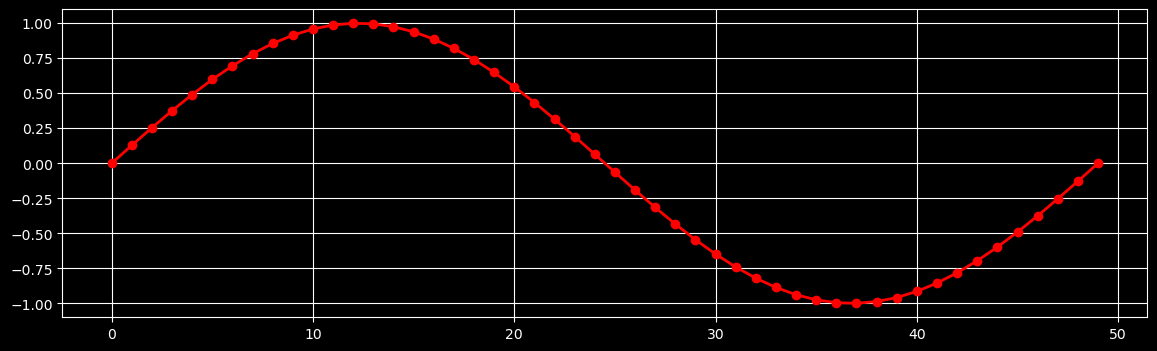

In [5]:
with plt.style.context('dark_background'): # temporary style change
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()